## Introduction to Seaborn

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Some of the features that seaborn offers are

1) Built-in themes for styling matplotlib graphics <br>
2) Tools for choosing color palettes to make beautiful plots that reveal patterns in your data <br>
3) Functions for visualizing and comparing subsets of data <br>
4) Tools that fit and visualize linear regression models <br>
5) Functions that visualize matrices of data and use clustering algorithms<br>
6) Plot timeseries data with flexible estimation and representation of uncertainty around the estimate <br>
7) High-level abstractions for structuring grids of plots that let you easily build complex visualizations <br>

References: http://seaborn.pydata.org/introduction.html

In [1]:
# Import Pandas for reading and managing data
import pandas as pd

# Import pyplot function from matplotlib and 
from matplotlib import pyplot as plt
%matplotlib inline

# Import seaborn with alias 'sns'
import seaborn as sns

# Set theme
sns.set_style('whitegrid')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Plot Stock Closing Price data for Intel: 'INTL' using a line chart

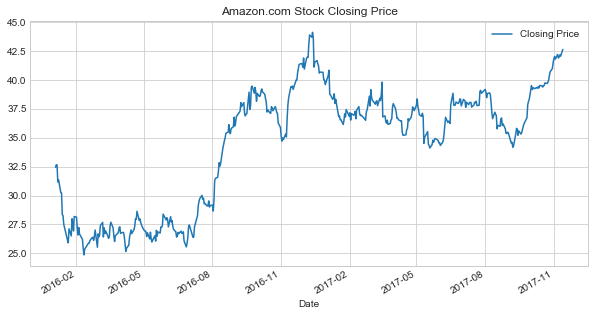

In [2]:
import pandas_datareader.data as web
from datetime import datetime


# Declare Variables to pull data from Yahoo Stocks API
start = '2016-01-01'
end = datetime.now()
stock_name = 'INTL'
stock_source = 'yahoo'
 
# Call Remoret Yahoo Stocks API
AMZ = web.DataReader(stock_name, stock_source, start, end)

# Plot a line chart 
AMZ['Adj Close'].plot(legend=True, 
                      figsize=(10, 5), 
                      title='Amazon.com Stock Closing Price', 
                      label='Closing Price')

### Visualizing Different Statistical Metrics

This dataset features various characteristics of famous Pokemon cartoon characters.

In [3]:
# Read sample dataset and display head
df = pd.read_csv('Pokemon.csv', index_col=0, encoding = "ISO-8859-1")
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Index,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### Linear Model Plot

'Attack' to 'Defense' values represented using Scatter plot and a Linear Regression model fit across the points.

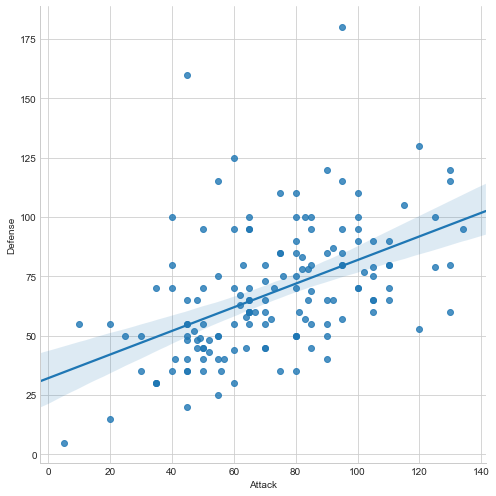

In [4]:
# Plot data and fit a regression model across data points
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=True, size=7)

### Categorization by adding Hue

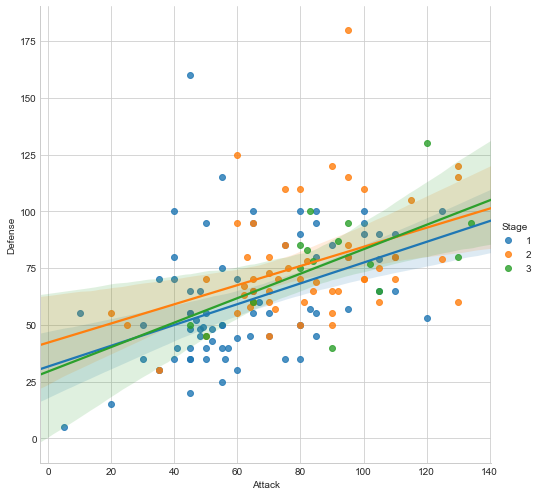

In [5]:
# Add parameters to categorize data using hue and add dimension to plot

sns.lmplot(x='Attack', y='Defense', data=df, hue='Stage', fit_reg=True, size=7)

### Box Plot

Draw a box plot to show distributions with respect to categories.

A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

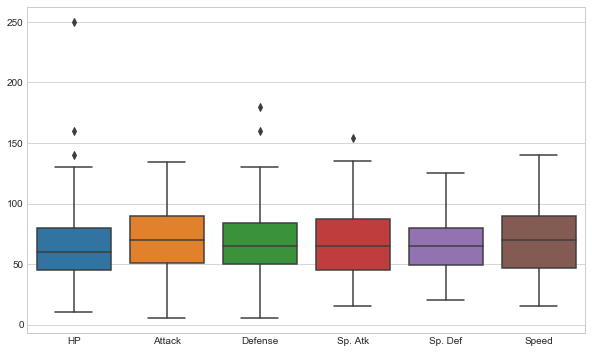

In [6]:
# Drop categorical values to see accurate summarized stats using a Box Plot
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

plt.figure(figsize=(10,6))
sns.boxplot(data=stats_df)

### Using Color Palettes

In [7]:
# Color Palettes

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

### Count Plot / Bar Plot

Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

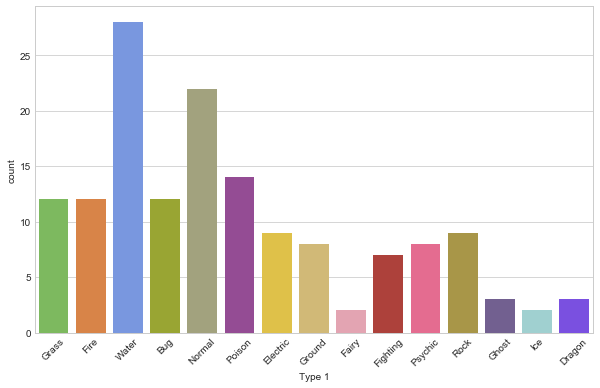

In [8]:
plt.figure(figsize=(10,6))

# Count Plot (Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=45)

### Violin Plot

Draw a combination of boxplot and kernel density estimate.

It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

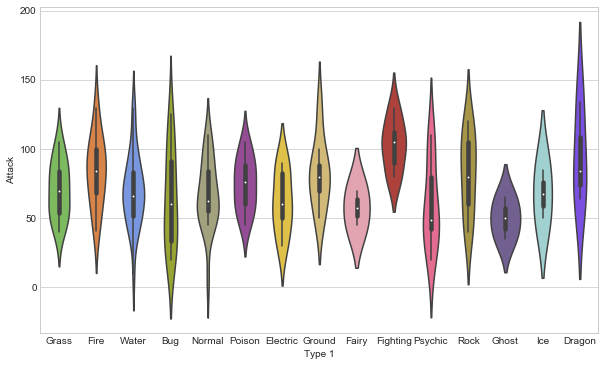

In [9]:
plt.figure(figsize=(10,6))

# Violin plot with Pokemon color palette and set color palette
sns.violinplot(x='Type 1', y='Attack', data=df,  palette=pkmn_type_colors)

### Swarm Plot

Draw a categorical scatterplot with non-overlapping points. The points are adjusted only along the categorical axis so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations.

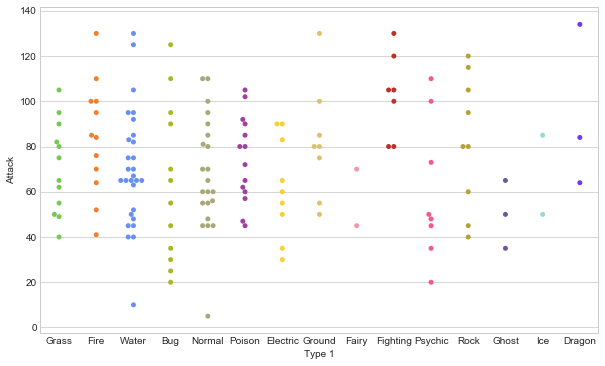

In [10]:
plt.figure(figsize=(10,6))

# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

### Overlaying Plots

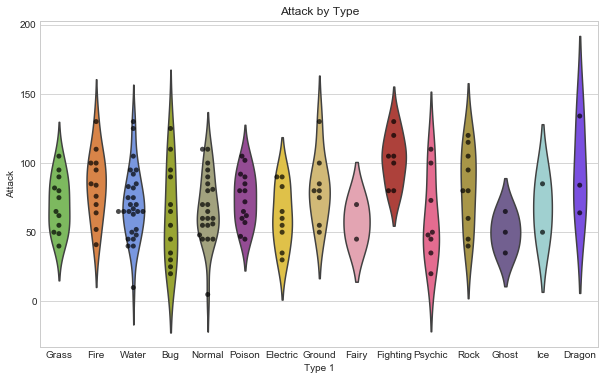

In [11]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

### Distribution Plot

Flexibly plot a univariate distribution of observations. Also fit scipy.stats distributions and plot the estimated PDF over the data.

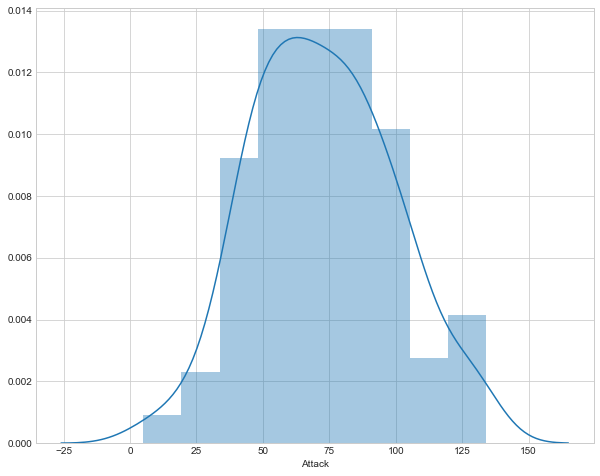

In [12]:
# Distribution Plot (Histogram)
plt.figure(figsize=(10,8))
sns.distplot(df.Attack)

### Heatmap

Plot rectangular data as a color-encoded matrix.

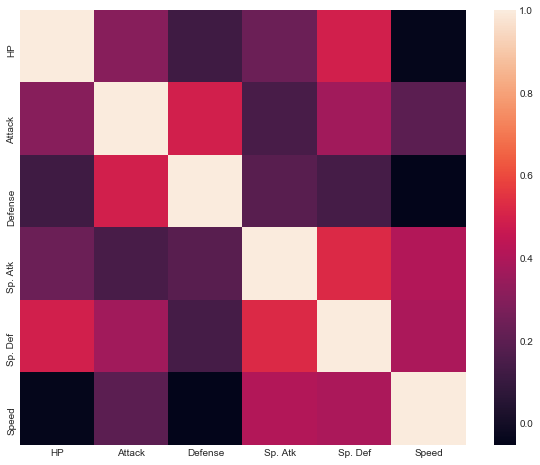

In [13]:
# Calculate correlations
corr = stats_df.corr()
plt.figure(figsize=(10,8))
 
# Heatmap
sns.heatmap(corr)

# Exercise Problem 1

Use inbuilt 'iris' dataset to plot below items:

* Load 'iris' dataset using <b>seaborn.load_dataset()</b> into a dataframe
* Draw a box plot to show distributions with respect to flower physical properties.
* Draw a categorical scatterplot using your own color palette

## Exercise Problem 2

Use inbuilt 'titanic' dataset and perform below tasks:

* Load 'iris' dataset using <b>seaborn.load_dataset()</b> into a dataframe
* Explore Facet Grid Plot using Seaborn
* Display the relation between 'Age', 'Sex', 'Alive', 'pclass' using a Facet Grid plot function in seaborn.